SVM - mean accuracies (std) 
 cat (specificity): 0.837500 (0.094004) 
 dog (recall): 0.776923 (0.068371) 
 overall: 0.806000 (0.043863) 

LogReg - mean accuracies (std) 
 cat (specificity): 0.802083 (0.078920) 
 dog (recall): 0.750000 (0.088962) 
 overall: 0.775000 (0.049346) 

RF - mean accuracies (std) 
 cat (specificity): 0.737500 (0.076942) 
 dog (recall): 0.796154 (0.076053) 
 overall: 0.768000 (0.046217) 

About 50.0 percent of mislabels by the SVM is shared by all models.
About 48.0 percent of mislabels by the LogReg is shared by all models.
About 48.0 percent of mislabels by the RF is shared by all models.


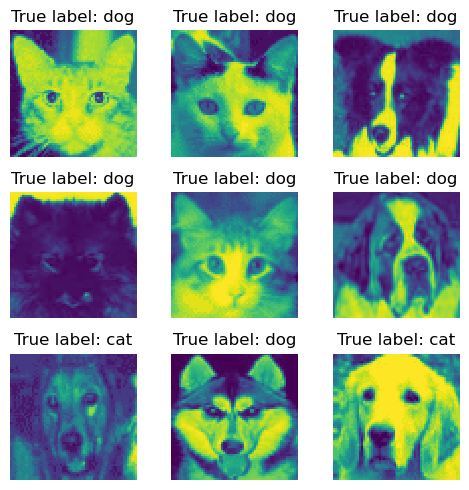

Fraction of missclassified dogs: 0.750000
Fraction of missclassified cats: 0.250000 
(according to algorithm)


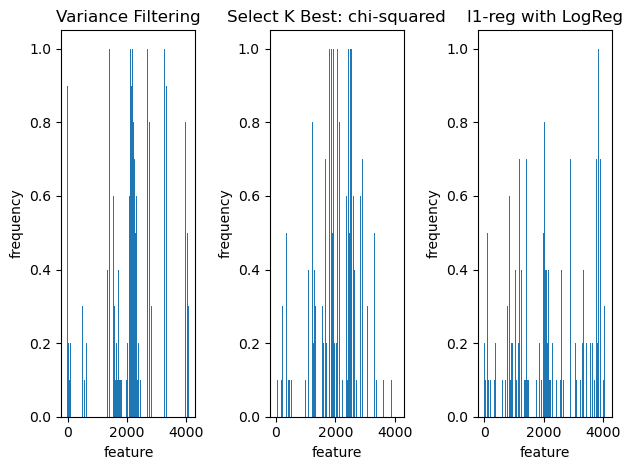

Number of features with frequency > 0.7 for variance filtering: 444 

Number of features with frequency > 0.7 for select K best: 421 

Number of features with frequency > 0.7 for lasso regularization: 126 

Number of features with frequency > 0.7 for shared: 124 



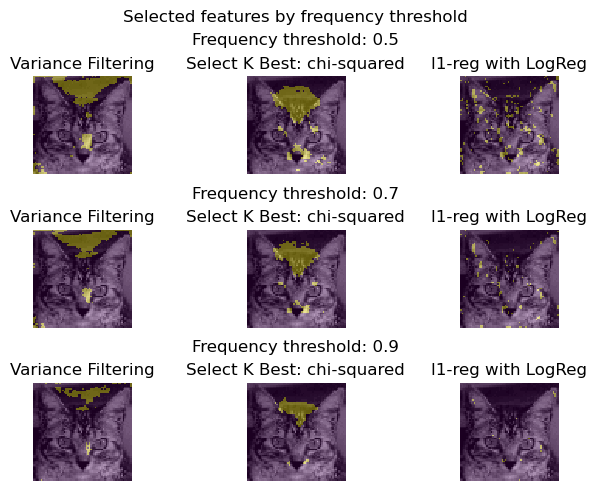

In [1]:
import ipynb.fs.full.q1a as q1a
import ipynb.fs.full.q1b as q1b

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans

def read_data_file(filename: str) -> pd.DataFrame:
    path = Path(os.getcwd() + 'q1a.ipynb')
    data_folder = str(path.parent.absolute()) + '/data/'
    return pd.read_csv(data_folder + filename)


features = read_data_file('CATSnDOGS.csv') / 255
labels = read_data_file('Labels.csv')

features_cpy = features.copy()
df = features_cpy.join(labels['x'].copy())

cat_features = df[df.x == 0]
cat_features.reset_index(inplace=True, drop=True)
cat_labels = cat_features.pop('x')

dog_features = df[df.x == 1]
dog_labels = dog_features.pop('x')
dog_features.reset_index(inplace=True, drop=True)

### CATS ###

In [11]:
cat_means = KMeans(n_clusters=2).fit(cat_features)
cat_cluster_labels = cat_means.labels_

tuned_models = q1a.tune_ensemble(q1a.models, cat_features, pd.DataFrame(cat_cluster_labels))
result = q1a.evaluate_ensemble(tuned_models, cat_features, pd.DataFrame(cat_cluster_labels))
scores = q1a.calc_scores(result)

mean, std = q1a.average_scores(tuned_models, cat_features, pd.DataFrame(cat_cluster_labels), iter=20)
mislabels = q1a.detect_mislabels(tuned_models, cat_features, pd.DataFrame(cat_cluster_labels), iter=20, vote_limit=0.7)

In [ ]:
q1a.print_accuracy(mean, std, ['cluster 1', 'cluster 2'])

intersection = q1a.mislabel_intersection(mislabels)
if len(intersection) != 0:
    q1a.plot_mislabeled_images(cat_features, pd.DataFrame(cat_cluster_labels), intersection)

    tmp = labels.iloc[list(intersection), 0]
    frac_mislabeled_cluster_2 = tmp.sum() / len(tmp)
    frac_mislabeled_cluster_1 = 1 - frac_mislabeled_cluster_2
    print('Fraction of missclassified cluster 1 cats: %f \n(according to algorithm)' % frac_mislabeled_cluster_1)
    print('Fraction of missclassified cluster 2 cats: %f' % frac_mislabeled_cluster_2)
else:
    print("The models share no mislabeled images.")

In [ ]:
freq_df = q1b.bootstrap_selection_methods(cat_features, pd.DataFrame(cat_cluster_labels), iter=100)
titles = ['Variance Filtering', 'Select K Best: chi-squared', 'l1-reg with LogReg']
q1b.plot_feature_frequencies(freq_df, titles)

threshold = 0.7
methods_top_features = q1b.get_methods_top_features(freq_df, threshold)
top_filter = methods_top_features[0]
top_select = methods_top_features[1]
top_sparse = methods_top_features[2]

top_shared = top_filter.intersection(top_select).union(top_filter.intersection(top_sparse)).union(top_select.intersection(top_sparse))

top_feat = {"variance filtering": top_filter, "select K best": top_select, "lasso regularization": top_sparse, "shared": top_shared}
for type, feat in top_feat.items():
    print("Number of features with frequency > %s for %s: %d \n" %(threshold, type, len(feat)))

thresholds = [0.5, 0.7, 0.9]
q1b.plot_top_features(cat_features, pd.DataFrame(cat_cluster_labels), freq_df, titles, thresholds)

### DOGS ###

In [8]:
dog_means = KMeans(n_clusters=2).fit(dog_features)
dog_cluster_labels = dog_means.labels_

tuned_models = q1a.tune_ensemble(q1a.models, dog_features, pd.DataFrame(dog_cluster_labels))
result = q1a.evaluate_ensemble(tuned_models, dog_features, pd.DataFrame(dog_cluster_labels))
scores = q1a.calc_scores(result)

mean, std = q1a.average_scores(tuned_models, dog_features, pd.DataFrame(dog_cluster_labels), iter=20)
mislabels = q1a.detect_mislabels(tuned_models, dog_features, pd.DataFrame(dog_cluster_labels), iter=20, vote_limit=0.7)

SVM - mean accuracies (std) 
 cluster 1 (specificity): 0.940000 (0.055377) 
 cluster 2 (recall): 0.895455 (0.052025) 
 overall: 0.921154 (0.039364) 

LogReg - mean accuracies (std) 
 cluster 1 (specificity): 0.933333 (0.073030) 
 cluster 2 (recall): 0.890909 (0.054545) 
 overall: 0.915385 (0.044853) 

RF - mean accuracies (std) 
 cluster 1 (specificity): 0.953333 (0.047610) 
 cluster 2 (recall): 0.845455 (0.086722) 
 overall: 0.907692 (0.039223) 

About 80.0 percent of mislabels by the SVM is shared by all models.
About 66.67 percent of mislabels by the LogReg is shared by all models.
About 66.67 percent of mislabels by the RF is shared by all models.


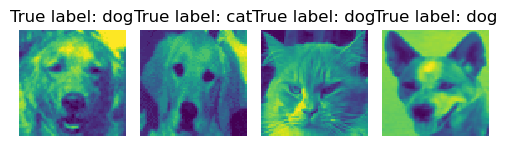

Fraction of missclassified cluster 1 dogs: 0.250000 
(according to algorithm)
Fraction of missclassified cluster 2 dogs: 0.750000


In [9]:
q1a.print_accuracy(mean, std, ['cluster 1', 'cluster 2'])

intersection = q1a.mislabel_intersection(mislabels)

if len(intersection) != 0:
    q1a.plot_mislabeled_images(dog_features, pd.DataFrame(dog_cluster_labels), intersection)

    tmp = labels.iloc[list(intersection), 0]
    frac_mislabeled_cluster_2 = tmp.sum() / len(tmp)
    frac_mislabeled_cluster_1 = 1 - frac_mislabeled_cluster_2
    print('Fraction of missclassified cluster 1 dogs: %f \n(according to algorithm)' % frac_mislabeled_cluster_1)
    print('Fraction of missclassified cluster 2 dogs: %f' % frac_mislabeled_cluster_2)
else:
    print("The models share no mislabeled images.")

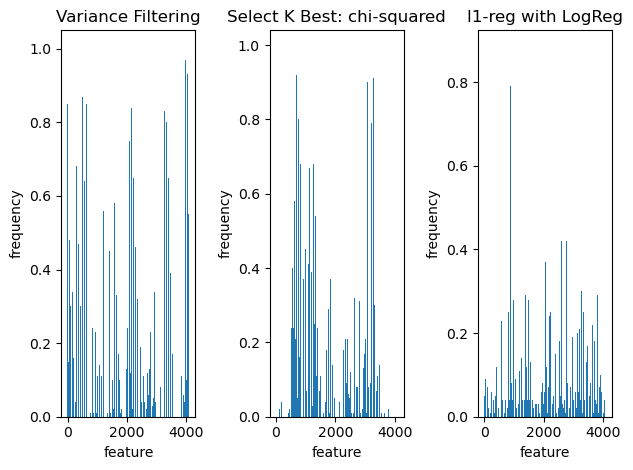

Number of features with frequency > 0.7 for variance filtering: 306 

Number of features with frequency > 0.7 for select K best: 234 

Number of features with frequency > 0.7 for lasso regularization: 28 

Number of features with frequency > 0.7 for shared: 15 



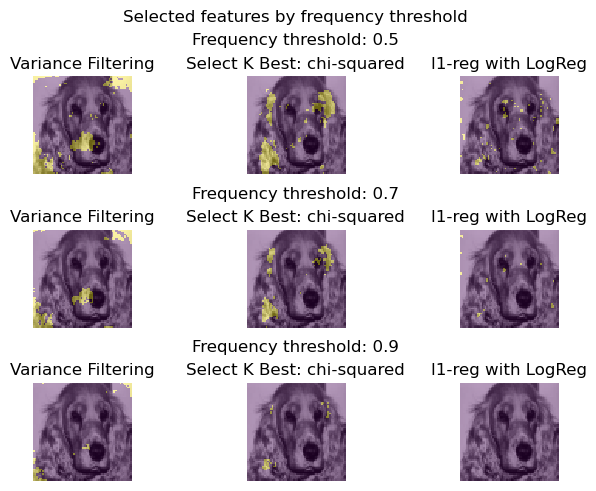

In [10]:
freq_df = q1b.bootstrap_selection_methods(dog_features, pd.DataFrame(dog_cluster_labels), iter=100)
titles = ['Variance Filtering', 'Select K Best: chi-squared', 'l1-reg with LogReg']
q1b.plot_feature_frequencies(freq_df, titles)

threshold = 0.7
methods_top_features = q1b.get_methods_top_features(freq_df, threshold)
top_filter = methods_top_features[0]
top_select = methods_top_features[1]
top_sparse = methods_top_features[2]

top_shared = top_filter.intersection(top_select).union(top_filter.intersection(top_sparse)).union(top_select.intersection(top_sparse))

top_feat = {"variance filtering": top_filter, "select K best": top_select, "lasso regularization": top_sparse, "shared": top_shared}
for type, feat in top_feat.items():
    print("Number of features with frequency > %s for %s: %d \n" %(threshold, type, len(feat)))

thresholds = [0.5, 0.7, 0.9]
q1b.plot_top_features(dog_features, pd.DataFrame(dog_cluster_labels), freq_df, titles, thresholds)